In [141]:
# ALL THE IMPORTED LIBRARIES AND THE DATAFRAME
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
file_path = 'GSAF5.xls'  # Adjust this if the file is in another directory
df = pd.read_excel(file_path)

In [135]:
# ALL THE LISTS
northern_hemisphere = [
    'Morocco', 'Jamaica', 'Belize', 'USA', 'Maldive Islands', 'Turks and Caicos', 'French Polynesia', 'Tobago', 'Bahamas', 'AUSTRALIA', 'INDIA', 'TRINIDAD',
    'BAHAMAS', 'MEXICO', 'NEW ZEALAND', 'EGYPT', 'Mexico', 'BELIZE', 'PHILIPPINES', 'SPAIN', 'PORTUGAL', 'COLOMBIA', 'CUBA', 'BRAZIL', 'ARGENTINA', 'MeXICO',
    'Maldives', 'South Africa', 'ENGLAND', 'JAPAN', 'INDONESIA', 'JAMAICA', 'THAILAND', 'COLUMBIA', 'COSTA RICA', 'New Zealand', 'CANADA', 'JORDAN',
    'ST KITTS / NEVIS', 'ST MARTIN', 'ISRAEL', 'CHINA', 'IRELAND', 'ITALY', 'LIBYA', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'Fiji', 
    'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA', 'PUERTO RICO', 'PERU', 'GHANA', 'GREENLAND', 'MEDITERRANEAN SEA', 'ROATAN',
    'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'TAIWAN', 'PALESTINIAN TERRITORIES', 'GUAM', 'TONGA', 'SCOTLAND',
    'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA', 'RUSSIA', 'UNITED ARAB EMIRATES (UAE)', 'MALTA', 'PANAMA', 'NEVIS',
    'BRITISH VIRGIN ISLANDS', 'NORWAY', 'SENEGAL', 'YEMEN', 'GULF OF ADEN', 'Seychelles', 'LIBERIA', 'VANUATU', 'MEXICO ', 'HONDURAS', 'VENEZUELA',
    'SRI LANKA', 'URUGUAY', 'MICRONESIA', 'CARIBBEAN SEA', 'OKINAWA', 'EGYPT / ISRAEL', 'NORTHERN ARABIAN SEA', 'HONG KONG', 'EL SALVADOR',
    'ANGOLA', 'IRAN', 'TUNISIA', 'NAMIBIA', 'NORTH ATLANTIC OCEAN', 'SOUTH CHINA SEA', 'BANGLADESH', 'PALAU', 'PACIFIC OCEAN ',
    'BRITISH ISLES', 'GRENADA', 'IRAQ', 'TURKEY', 'SINGAPORE', 'NORTHERN MARIANA ISLANDS', 'SIERRA LEONE', 'PHILIPPINES', 'NICARAGUA',
    'CENTRAL PACIFIC', 'SLOVENIA', 'CURACAO', 'ICELAND', 'BARBADOS', 'MONACO', 'GUYANA', 'HAITI', 'SAN DOMINGO', 'KUWAIT', 'YEMEN ',
    'FALKLAND ISLANDS', 'CRETE', 'CYPRUS', 'EGYPT ', 'WEST INDIES', 'LEBANON',
    'PARAGUAY', 'GEORGIA', 'SYRIA', 'INDIAN OCEAN?', 'GUINEA','BAHREIN', 'KOREA', 'RED SEA?'
]

southern_hemisphere = [
    'Coral Sea', 'SAMOA', 'ECUADOR', 'NEW CALEDONIA', 'TURKS and CaICOS', 'SEYCHELLES', 'FIJI', 'MALDIVES', 'SOUTH AFRICA', 'REUNION ISLAND', 'REUNION', 'SOLOMON ISLANDS',
    'ST HELENA, British overseas territory', 'COMOROS', 'CAPE VERDE', 'MOZAMBIQUE', 'ATLANTIC OCEAN', 'TONGA', 'SCOTLAND', 'ANTIGUA', 'MADAGASCAR', 'SOMALIA',
    'NORWAY', 'Seychelles', 'VANUATU', 'TONGA', 'MARSHALL ISLANDS', 'FEDERATED STATES OF MICRONESIA', 'MID ATLANTIC OCEAN', 'ADMIRALTY ISLANDS',
    'SOUTH ATLANTIC OCEAN', 'RED SEA / INDIAN OCEAN', 'PACIFIC OCEAN', 'NICARAGUA ', 'MALDIVE ISLANDS', 'AMERICAN SAMOA', 'ANDAMAN / NICOBAR ISLANDAS',
    'GABON', 'MAYOTTE', 'NORTH ATLANTIC OCEAN ', 'THE BALKANS', 'MARTINIQUE', 'INDIAN OCEAN', 'JAVA', 'SOLOMON ISLANDS / VANUATU', 'SOUTHWEST PACIFIC OCEAN',
    'BAY OF BENGAL', 'MID-PACIFC OCEAN', 'ITALY / CROATIA', 'BURMA', 'BRITISH NEW GUINEA', 'CEYLON', 'OCEAN', 'GUINEA', 'ANDAMAN ISLANDS',
    'EQUATORIAL GUINEA / CAMEROON', 'COOK ISLANDS', 'TOBAGO', 'AFRICA', 'ALGERIA', 'Coast of AFRICA', 'TASMAN SEA', 'NORTHERN MARIANA ISLANDS', 'NICARAGUA ',
    'MAYOTTE', 'GABON', 'DJIBOUTI'
]

countries = [
    'Morocco', 'Jamaica', 'Belize','Maldive Islands', 'Turks and Caicos', 'French Polynesia', 'Tobago', 'Bahamas', 'AUSTRALIA', 'INDIA', 'TRINIDAD',
    'BAHAMAS', 'MEXICO', 'NEW ZEALAND', 'EGYPT', 'Mexico', 'BELIZE', 'PHILIPPINES', 'SPAIN', 'PORTUGAL', 'COLOMBIA', 'CUBA', 'BRAZIL', 'ARGENTINA', 'MeXICO',
    'Maldives', 'South Africa', 'ENGLAND', 'JAPAN', 'INDONESIA', 'JAMAICA', 'THAILAND', 'COLUMBIA', 'COSTA RICA', 'New Zealand', 'CANADA', 'JORDAN',
    'ST KITTS / NEVIS', 'ST MARTIN', 'ISRAEL', 'CHINA', 'IRELAND', 'ITALY', 'LIBYA', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'Fiji', 
    'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA', 'PUERTO RICO', 'PERU', 'GHANA', 'GREENLAND', 'MEDITERRANEAN SEA', 'ROATAN',
    'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'TAIWAN', 'PALESTINIAN TERRITORIES', 'GUAM', 'TONGA', 'SCOTLAND',
    'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA', 'RUSSIA', 'UNITED ARAB EMIRATES (UAE)', 'MALTA', 'PANAMA', 'NEVIS',
    'BRITISH VIRGIN ISLANDS', 'NORWAY', 'SENEGAL', 'YEMEN', 'GULF OF ADEN', 'Seychelles', 'LIBERIA', 'VANUATU', 'MEXICO ', 'HONDURAS', 'VENEZUELA',
    'SRI LANKA', 'URUGUAY', 'MICRONESIA', 'CARIBBEAN SEA', 'OKINAWA', 'EGYPT / ISRAEL', 'NORTHERN ARABIAN SEA', 'HONG KONG', 'EL SALVADOR',
    'ANGOLA', 'IRAN', 'TUNISIA', 'NAMIBIA', 'NORTH ATLANTIC OCEAN', 'SOUTH CHINA SEA', 'BANGLADESH', 'PALAU', 'PACIFIC OCEAN ',
    'BRITISH ISLES', 'GRENADA', 'IRAQ', 'TURKEY', 'SINGAPORE', 'NORTHERN MARIANA ISLANDS', 'SIERRA LEONE', 'PHILIPPINES', 'NICARAGUA',
    'CENTRAL PACIFIC', 'SLOVENIA', 'CURACAO', 'ICELAND', 'BARBADOS', 'MONACO', 'GUYANA', 'HAITI', 'SAN DOMINGO', 'KUWAIT', 'YEMEN ',
    'FALKLAND ISLANDS', 'CRETE', 'CYPRUS', 'EGYPT ', 'WEST INDIES', 'LEBANON',
    'PARAGUAY', 'GEORGIA', 'SYRIA', 'INDIAN OCEAN?', 'GUINEA','BAHREIN', 'KOREA', 'RED SEA?', 'Coral Sea', 'SAMOA', 'ECUADOR', 'NEW CALEDONIA', 'TURKS and CaICOS', 'SEYCHELLES', 'FIJI', 'MALDIVES', 'SOUTH AFRICA', 'REUNION ISLAND', 'REUNION', 'SOLOMON ISLANDS',
    'ST HELENA, British overseas territory', 'COMOROS', 'CAPE VERDE', 'MOZAMBIQUE', 'ATLANTIC OCEAN', 'TONGA', 'SCOTLAND', 'ANTIGUA', 'MADAGASCAR', 'SOMALIA',
    'NORWAY', 'Seychelles', 'VANUATU', 'TONGA', 'MARSHALL ISLANDS', 'FEDERATED STATES OF MICRONESIA', 'MID ATLANTIC OCEAN', 'ADMIRALTY ISLANDS',
    'SOUTH ATLANTIC OCEAN', 'RED SEA / INDIAN OCEAN', 'PACIFIC OCEAN', 'NICARAGUA ', 'MALDIVE ISLANDS', 'AMERICAN SAMOA', 'ANDAMAN / NICOBAR ISLANDAS',
    'GABON', 'MAYOTTE', 'NORTH ATLANTIC OCEAN ', 'THE BALKANS', 'MARTINIQUE', 'INDIAN OCEAN', 'JAVA', 'SOLOMON ISLANDS / VANUATU', 'SOUTHWEST PACIFIC OCEAN',
    'BAY OF BENGAL', 'MID-PACIFC OCEAN', 'ITALY / CROATIA', 'BURMA', 'BRITISH NEW GUINEA', 'CEYLON', 'OCEAN', 'GUINEA', 'ANDAMAN ISLANDS',
    'EQUATORIAL GUINEA / CAMEROON', 'COOK ISLANDS', 'TOBAGO', 'AFRICA', 'ALGERIA', 'Coast of AFRICA', 'TASMAN SEA', 'NORTHERN MARIANA ISLANDS', 'NICARAGUA ',
    'MAYOTTE', 'GABON', 'DJIBOUTI'
]

In [162]:
# ALL FUNCTIONS AND WHERE WE USED THEM
def extract_month(date_str):
    """
    Extracts the month from a date string in various formats.
    Args:
        date_str (str): The date string to extract the month from. This could be in formats like "30-Jun-1993", "Feb-1953", "1940", etc.
    Returns:
        str or None: The abbreviated month name (e.g., "Jun") if found, otherwise None.
    """
    # Checks if it is a time stamp
    if isinstance(date_str, pd.Timestamp):
        date_str = date_str.strftime("%d-%b-%Y")

    # filters all the months ignoring uppercase
    month_pattern = re.compile(r"(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)", re.IGNORECASE)
    match = month_pattern.search(date_str)

    # if it finds the month, adds it to the list, otherwise, returns nothing
    if match:
        return match.group(1)
    
    elif re.match(r"^\d{1,2}/\d{1,2}/\d{2,4}$", date_str):
        parts = date_str.split("/")
        if int(parts[0]) > 12 and int(parts[1]) > 12:
            return None
        return None
    else:
        return None

        
def its_fatal(fatal_str):
    """
    Extracts the month from a date string in various formats.
    Args:
        date_str (str): The date string to extract the month from. This could be in formats like "30-Jun-1993", "Feb-1953", "1940", etc.
    Returns:
        str or None: The abbreviated month name (e.g., "Jun") if found, otherwise None.
    """
    return "Fatal" if re.search(r"fatal", fatal_str, re.IGNORECASE) else "Non Fatal"

def determine_hemisphere(country):
    """
    Determines the hemisphere for a given country.
    Args:
        country (str): The name of the country to determine the hemisphere for.
    Returns:
        str: The hemisphere where the country is located ("Northern Hemisphere", "Southern Hemisphere", or "Unknown").
    """
    if pd.isnull(country):
        return 'Unknown'
    country = country.strip().upper() 
    if country in map(str.upper, northern_hemisphere):
        return 'Northern Hemisphere'
    elif country in map(str.upper, southern_hemisphere):
        return 'Southern Hemisphere'
    else:
        return 'Unknown'

# Function to find season based on month and hemisphere
def find_season(month, hemisphere):
    """
    Extracts the month from a date string in various formats.
    Args:
        date_str (str): The date string to extract the month from. This could be in formats like "30-Jun-1993", "Feb-1953", "1940", etc.
    Returns:
        str or None: The abbreviated month name (e.g., "Jun") if found, otherwise None.
    """
    if hemisphere == "Southern Hemisphere":
        season_month_south = {
            "Dec": "Summer", "Jan": "Summer", "Feb": "Summer",
            "Mar": "Autumn", "Apr": "Autumn", "May": "Autumn",
            "Jun": "Winter", "Jul": "Winter", "Aug": "Winter",
            "Sep": "Spring", "Oct": "Spring", "Nov": "Spring"
        }
        return season_month_south.get(month)
    elif hemisphere == "Northern Hemisphere":
        season_month_north = {
            "Dec": "Winter", "Jan": "Winter", "Feb": "Winter",
            "Mar": "Spring", "Apr": "Spring", "May": "Spring",
            "Jun": "Summer", "Jul": "Summer", "Aug": "Summer",
            "Sep": "Autumn", "Oct": "Autumn", "Nov": "Autumn"
        }
        return season_month_north.get(month)
    else:
        return "Unknown Hemisphere"

# Convert all dates to strings
df["Date"] = df["Date"].astype(str)

# Apply the extraction function to the "Date" column
df["Month"] = df["Date"].apply(extract_month)

# Drop rows where "Month" is None
df = df.dropna(subset=["Month"])

# Apply the determine_hemisphere function
df['Hemisphere'] = df['Country'].apply(determine_hemisphere)

# Apply the find_season function
df['Season'] = df.apply(lambda row: find_season(row['Month'], row['Hemisphere']), axis=1)

df = df.dropna(subset=["Hemisphere"])
# Count occurrences of months and seasons by hemisphere
month_counts = df.groupby(['Hemisphere', 'Month']).size().unstack(fill_value=0)
season_counts = df.groupby(['Hemisphere', 'Season']).size().unstack(fill_value=0)
df["Fatal"] = df["Injury"].astype(str).apply(its_fatal)
df = df.drop(df[df["Season"] == "Unknown Hemisphere"].index)

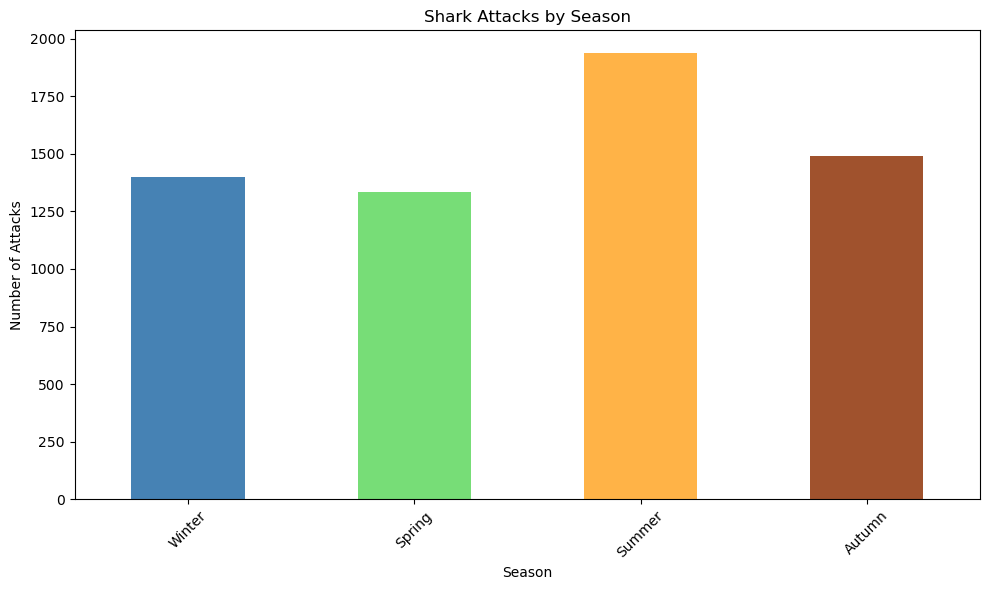

In [164]:
# SHARK ATTACKS BY SEASON BAR PLOT
season_order = ["Winter", "Spring", "Summer", "Autumn"]

combined_season_counts = df['Season'].value_counts().reindex(season_order)

season_colors = {
    "Winter": "#4682B4",
    "Spring": "#77DD77",
    "Summer": "#FFB347",
    "Autumn": "#A0522D",
    }

plt.figure(figsize=(10, 6))
combined_season_counts.plot(kind='bar', color=[season_colors.get(season) for season in combined_season_counts.index])
plt.title('Shark Attacks by Season')
plt.xlabel('Season')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\masii\AppData\Local\Temp\ipykernel_18032\1875351337.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=usa_df, x='Month', y='Attacks', palette='mako')
C:\Users\masii\AppData\Local\Temp\ipykernel_18032\1875351337.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aus_df, x='Month', y='Attacks', palette='mako')


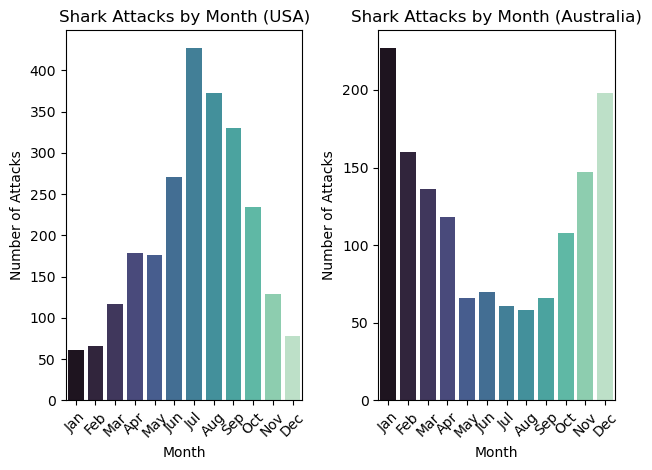

In [79]:
# SHARK ATTACKS BY MONTH USA/AUSTRALIA
# Filter the DataFrame for USA and Australia
df_usa = df[df['Country'].str.contains('USA', case=False)]
df_aus = df[df['Country'].str.contains('AUSTRALIA', case=False)]

# Count shark attacks by month for USA
usa_monthly_counts = df_usa['Month'].value_counts(sort=False).reindex([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], fill_value=0)

# Count shark attacks by month for Australia
aus_monthly_counts = df_aus['Month'].value_counts(sort=False).reindex([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], fill_value=0)
# Create a DataFrame for plotting
usa_df = pd.DataFrame({'Month': usa_monthly_counts.index, 'Attacks': usa_monthly_counts.values})
aus_df = pd.DataFrame({'Month': aus_monthly_counts.index, 'Attacks': aus_monthly_counts.values})

# USA plot with seaborn magma palette
plt.subplot(1, 2, 1)
sns.barplot(data=usa_df, x='Month', y='Attacks', palette='mako')
plt.title('Shark Attacks by Month (USA)')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)

# Australia plot with seaborn rocket palette
plt.subplot(1, 2, 2)
sns.barplot(data=aus_df, x='Month', y='Attacks', palette='mako')
plt.title('Shark Attacks by Month (Australia)')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


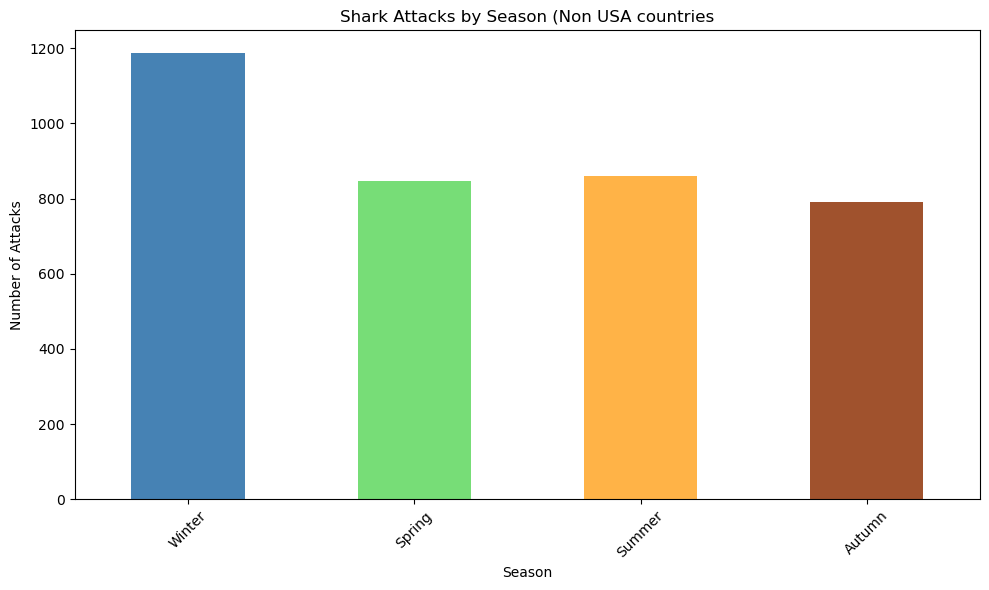

In [263]:
# SHARK ATTACKS BY SEASON (WITHOUT USA)
# Filter DataFrame based on the selected countries
df["most_countries_data"] = df["Country"].apply(lambda x: x in countries)

# Count occurrences of seasons for the selected countries
combined_season_counts = df[df["most_countries_data"]]['Season'].value_counts().reindex(season_order)

# Plot the data
plt.figure(figsize=(10, 6))
combined_season_counts.plot(kind='bar', color=[season_colors.get(season) for season in combined_season_counts.index])
plt.title('Shark Attacks by Season (Non USA countries')
plt.xlabel('Season')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



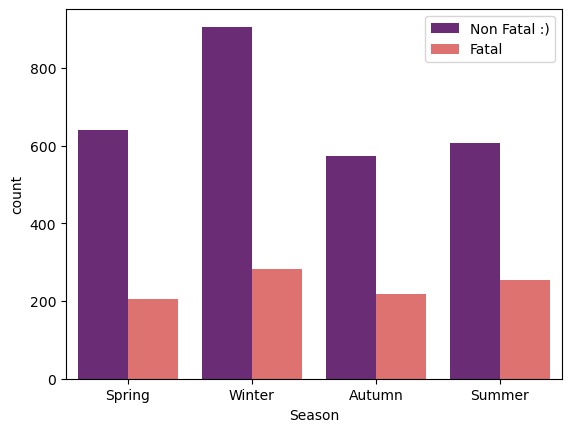

In [185]:
# TOTAL FATALITIES
# Count occurrences of seasons for the selected countries
fatal_counts = df["Fatal"].value_counts()

sns.countplot(x=df[df["most_countries_data"]]['Season'], hue=df["Fatal"], palette="magma")

# Add a legend to the plot to label the 'dead' and 'not dead :)' categories
plt.legend(labels=['Non Fatal :)', 'Fatal'])

       Continent  Country Count
0  North America           2761
1        Oceania           1675
2         Africa            636
3           Asia            186
4         Europe            186
5  South America            158


C:\Users\masii\AppData\Local\Temp\ipykernel_18032\3851046258.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Continent', y='Country Count', data=continent_df, palette='flare')  # Choose your preferred palette


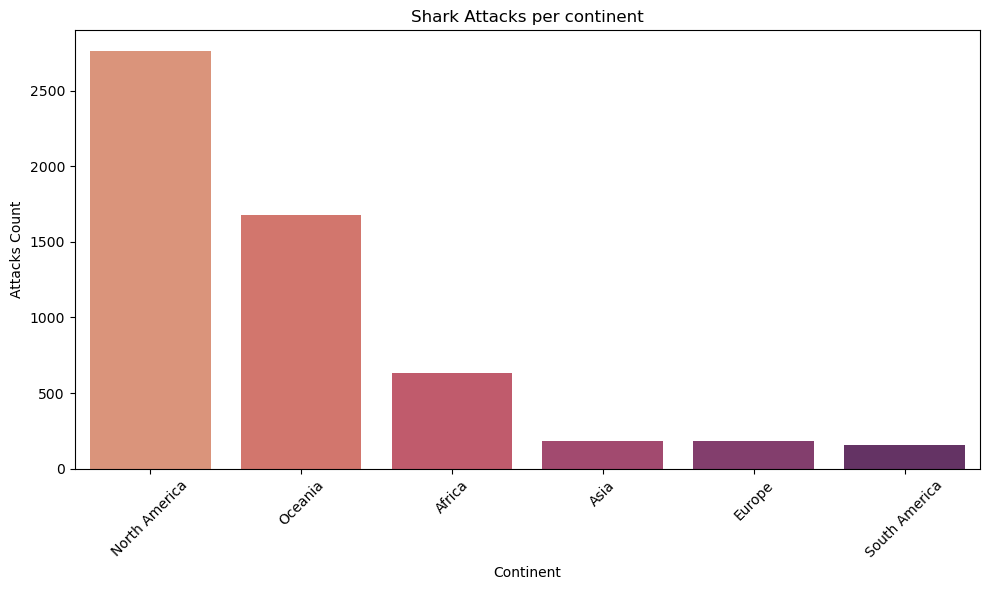

In [111]:
# NUMBER OF ATTACKS PER CONTINENT
# Define countries by continent
countries_by_continent = {
    'North America': [
        'USA', 'CANADA', 'MEXICO', 'JAMAICA', 'BELIZE', 'CUBA',
        'BAHAMAS', 'TURKS AND CAICOS', 'DOMINICAN REPUBLIC'
    ],
    'South America': [
        'BRAZIL', 'ARGENTINA', 'COLOMBIA', 'VENEZUELA', 'CHILE', 
        'ECUADOR', 'PERU', 'PARAGUAY', 'URUGUAY', 'GUYANA'
    ],
    'Europe': [
        'SPAIN', 'PORTUGAL', 'ITALY', 'FRANCE', 'IRELAND', 
        'UNITED KINGDOM', 'GREECE', 'NORWAY', 'SCOTLAND', 
        'CROATIA', 'BELGIUM', 'GERMANY', 'MALTA', 'CYPRUS'
    ],
    'Africa': [
        'MOROCCO', 'EGYPT', 'SOUTH AFRICA', 'KENYA', 'TUNISIA', 
        'GHANA', 'SENEGAL', 'LIBYA', 'ALGERIA', 'NAMIBIA'
    ],
    'Asia': [
        'INDIA', 'CHINA', 'JAPAN', 'INDONESIA', 'THAILAND', 
        'IRAN', 'BANGLADESH', 'PHILIPPINES', 'IRAQ', 'ISRAEL'
    ],
    'Oceania': [
        'AUSTRALIA', 'NEW ZEALAND', 'FIJI', 'SAMOA', 'MALDIVES', 
        'TONGA', 'KIRIBATI', 'SOLOMON ISLANDS', 'VANUATU'
    ],
}
# Create a reverse mapping from countries to continents
country_to_continent = {country: continent for continent, countries in countries_by_continent.items() for country in countries}

# Clean the country names in the DataFrame
df['Country'] = df['Country'].str.upper()  # Ensure all country names are uppercase

# Map countries to their respective continents
df['Continent'] = df['Country'].map(country_to_continent)

# Drop rows with NaN in 'Continent' (countries not found in the mapping)
df = df.dropna(subset=['Continent'])
# Generate a table based on continental data
continent_counts = df['Continent'].value_counts()

# Create a DataFrame for the continental counts
continent_df = continent_counts.reset_index()
continent_df.columns = ['Continent', 'Country Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='Country Count', data=continent_df, palette='flare')  # Choose your preferred palette
plt.title('Shark Attacks per continent')
plt.xlabel('Continent')
plt.ylabel('Attacks Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0, 0.5, '')

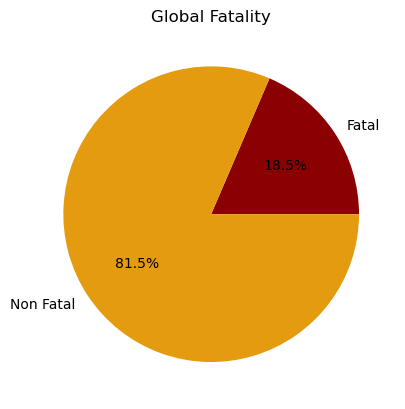

In [247]:
# GLOBAL FATALITY
colors_fatal = ["#8B0000", "#E49B0F"]
["#FFD700", "#FFD700"]
df.groupby("Fatal")["Fatal"].count().plot.pie(autopct="%.1f%%", colors=colors_fatal, title="Global Fatality")

plt.ylabel("")

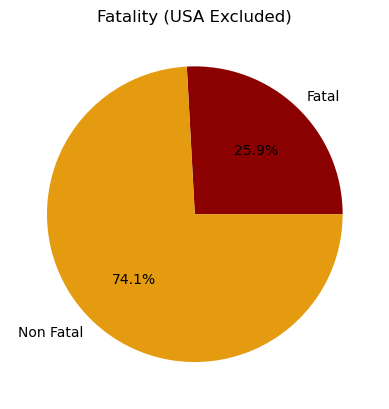

In [261]:
# FATALITY, USA EXCLUDED
df_filtered = df[df["Country"] != "USA"]

#colors_fatal = ["#8B0000", "#E49B0F"]
["#FFD700", "#FFD700"]
df_filtered.groupby("Fatal")["Fatal"].count().plot.pie(autopct="%.1f%%", colors=colors_fatal, title="Fatality (USA Excluded)")
plt.ylabel("")
plt.show()